In [1]:
!pip install easyocr
!pip install imutils

In [2]:
#import necesary libraries & dependencies
#OpenCV and EasyOcr is used

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

#only for macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

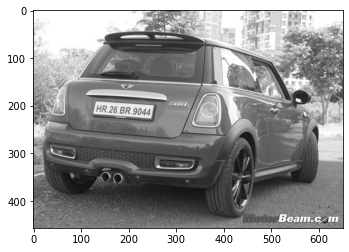

In [13]:
#input an image as data source
image = cv2.imread('ex1_working.jpeg')
turnToGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #apply grayscale for easier recognition
plt.imshow((cv2.cvtColor(turnToGray, cv2.COLOR_BGR2RGB)))

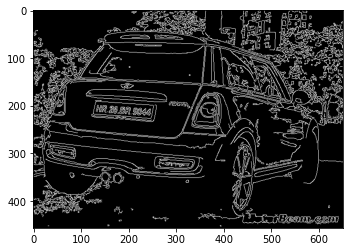

In [14]:
#edge detection
noiseReduction = cv2.bilateralFilter(turnToGray, 11, 17, 17) #may be specified with other values, depending on situation
edgeDetection = cv2.Canny(noiseReduction, 20, 200) #using Canny for edge detection
plt.imshow(cv2.cvtColor(edgeDetection, cv2.COLOR_BGR2RGB)) #visualize image

In [15]:
#cotour detection
#we want to detect a shape with 4 points, a rectangle, the shape of a number plate
findContour = cv2.findContours(edgeDetection.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # we are returning a tree, so we can traverse it and find our contour
foundContours = imutils.grab_contours(findContour)
sortedContours = sorted(foundContours, key=cv2.contourArea, reverse=True)[:10] #sort for the first 10 contours

In [16]:
location = None # array in which we store the countour's localization
for contour in sortedContours: # we loop throug the found contours
    apprx = cv2.approxPolyDP(contour, 10, True) #approximate polygon from our contour
    if len(apprx) == 4: #if the contour has 4 points, meaning is a rectangle, we store its coordinates
        location = apprx
        break
print(location)

[[[126 216]]

 [[133 191]]

 [[252 200]]

 [[246 227]]]


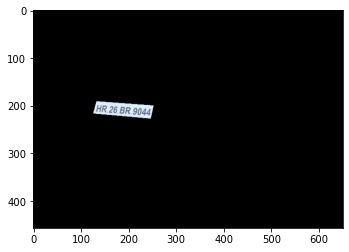

In [17]:
mask = np.zeros(turnToGray.shape, np.uint8) #create a blank mask similar to the grayscale image
newImage = cv2.drawContours(mask, [location], 0, 255, -1)
newImage = cv2.bitwise_and(image, image, mask=mask) #overlay the initial image with the generated mask
plt.imshow(cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB))

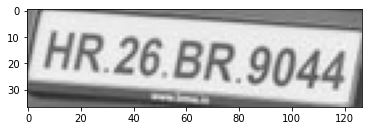

In [18]:
#crop the found license plate
(x,y) = np.where(mask==255) #set of coordinates regarding the image placement
(x1,y1) = (np.min(x), np.min(y)) #coordinates for the left handside
(x2,y2) = (np.max(x), np.max(y)) #coordintes for the right handside
licensePlate = turnToGray[x1:x2+1, y1:y2+1] #ray filtering from x1 to x2, y1 to y2
plt.imshow(cv2.cvtColor(licensePlate, cv2.COLOR_BGR2RGB))

In [19]:
#using easyOCR to read the text in the resulted image
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(licensePlate)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[2, 4], [126, 4], [126, 34], [2, 34]], 'HR.26.BR.9044', 0.9873007473238549)]
